In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import numpy as np
import csv
%matplotlib inline


In [2]:
#common variables

PROCCESSEDDATA = 'output/output_3.csv'


In [4]:
#Platforms & tools &libraries
TAGS = ['google-app-maker', 'appian', 'outsystems', 'zoho', 'mendix', 
        'powerapps', 'quickbase', 'vinyl', 'salesforce-lightning', 'github-copilot','Knack','Airtable']

# Research Related
TAGS += ['machine-learning', 'low-code']

# Keywords
TAGS += ['build-automation', 'sdlc', 'automation','integration','classification',
        'workflow','resource-management','user-interface', 'data-collection']

PLATFORMS = {
    'Salesforce' : ['salesforce-lightning', 'lwc', 'lightning', 'salesforce-communities',
        'salesforce-chatter', 'salesforce-service-cloud', 'aura-framework'],
    'Appian' : ['appian'],
    'Outsystems' : ['outsystems'],
    'AppMaker' : ['google-app-maker'],
    'Zoho' : ['zoho'],
    'Mendix' : ['mendix'],
    'PowerApps' : ['powerapps', 'powerapps-formula',
        'powerapps-selected-items', 'powerapps-collection', 'powerapps-canvas'],
    'QuickBase' : ['quickbase'],
    'Vinyl' : ['vinyl']
}


In [5]:
so_df = pd.read_csv(PROCCESSEDDATA)
so_df.CreationDate = so_df.CreationDate.apply(pd.to_datetime)
so_df.AcceptedAnswerCreationDate = so_df.AcceptedAnswerCreationDate.apply(pd.to_datetime)
# so_df.
so_df.dtypes

Id                                     int64
PostTypeId                             int64
AcceptedAnswerId                     float64
ParentId                             float64
CreationDate                  datetime64[ns]
DeletionDate                         float64
Score                                  int64
ViewCount                              int64
Body                                  object
LastEditDate                          object
LastActivityDate                      object
Title                                 object
Tags                                  object
AnswerCount                            int64
CommentCount                           int64
FavoriteCount                        float64
ClosedDate                            object
CommunityOwnedDate                    object
ContentLicense                        object
AcceptedAnswer                        object
AcceptedAnswerCreationDate    datetime64[ns]
dtype: object

In [6]:
print(so_df.sort_values(by='CreationDate').iloc[0].CreationDate)
so_df.sort_values(by='CreationDate').head(5)

2008-08-05 10:06:33.020000


,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,LastEditDate,...,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,ContentLicense,AcceptedAnswer,AcceptedAnswerCreationDate
0,2056,1,101561.0,NaN,2008-08-05 10:06:33.020,NaN,2241,525972,"<p>When looking beyond the <a href=""https://en...",2020-08-29T01:23:49.180,...,What are MVP and MVC and what is the difference?,<user-interface><model-view-controller><design...,24,5,1324.0,NaN,NaN,CC BY-SA 3.0,<h2>Model-View-Presenter</h2>\n<p>In <strong>M...,2008-09-19 12:46:52.687
1,2222,1,8753.0,NaN,2008-08-05 12:52:42.573,NaN,18,2657,<p>I'm currently working on an application wit...,2014-08-08T13:51:24.583,...,How can I unit test Flex applications from wit...,<apache-flex><eclipse><unit-testing><build-aut...,4,0,1.0,NaN,NaN,CC BY-SA 3.0,"<p>The <a href=""http://code.google.com/p/dpuin...",2008-08-12 12:28:18.340
2,2933,1,2937.0,NaN,2008-08-05 22:26:00.797,NaN,289,187921,<p>Python works on multiple platforms and can ...,2020-10-11T06:50:09.827,...,Create a directly-executable cross-platform GU...,<python><user-interface><deployment><tkinter><...,13,0,213.0,NaN,NaN,CC BY-SA 4.0,<p>First you will need some GUI library with P...,2008-08-05 22:34:25.397
3,3362,1,13130.0,NaN,2008-08-06 13:27:05.453,NaN,105,171758,<p>I would like to be able to use the <kbd>Tab...,2019-01-18T08:02:43.230,...,Capturing TAB key in text box,<javascript><user-interface>,6,2,27.0,2011-02-10T20:27:58.760,NaN,CC BY-SA 4.0,<p>Even if you capture the <code>keydown</code...,2008-08-16 13:55:26.087
4,3607,1,370131.0,NaN,2008-08-06 16:10:44.313,NaN,16,5236,<p>I've got TotroiseSVN installed and have a m...,2008-08-08T12:01:11.967,...,Integrating Fogbugz with TortoiseSVN with no U...,<svn><tortoisesvn><integration><fogbugz>,5,2,12.0,NaN,NaN,CC BY-SA 2.5,<p>I've been investigating this issue and have...,2008-12-16 00:03:30.553


# Stats per tag

In [7]:
sum = 0
no_of_questions = []
avg_view_count = []
avg_fav_count = []
for tag in TAGS:
    indicesToRemove = []
    for i in range(len(so_df)):
        qtags = so_df.iloc[i]['Tags'][1:-1].replace('><', ' ').split()
        f = True
        for qtag in qtags:
            if qtag == tag:
                f = False
                break
        if f:
            indicesToRemove.append(i)
    temp_df = so_df.drop(index=indicesToRemove)
    no_of_questions.append(len(temp_df))
    avg_view_count.append(temp_df.ViewCount.mean())
    avg_fav_count.append(temp_df.FavoriteCount.mean())
    sum += len(temp_df)
print(sum)
df = pd.DataFrame()
df['Tag_Name'] = TAGS
df['Num_of_Questions'] = no_of_questions
df['Avg_View_Count'] = avg_view_count
df['Avg_Fav_Count'] = avg_fav_count

df

12726


,Tag_Name,Num_of_Questions,Avg_View_Count,Avg_Fav_Count
0,google-app-maker,0,NaN,NaN
1,appian,0,NaN,NaN
2,outsystems,4,6486.250000,1.750000
3,zoho,12,1453.583333,0.800000
4,mendix,0,NaN,NaN
5,powerapps,0,NaN,NaN
6,quickbase,1,1355.000000,1.000000
7,vinyl,0,NaN,NaN
8,salesforce-lightning,0,NaN,NaN
9,github-copilot,0,NaN,NaN


# Stats per platform

In [9]:
sum = 0
no_of_questions = []
no_of_accepted_answers = []
avg_view_count = []
avg_fav_count = []
avg_score = []
for platform in PLATFORMS:
    indicesToRemove = []
    for i in range(len(so_df)):
        qtags = so_df.iloc[i]['Tags'][1:-1].replace('><', ' ').split()
        f = True
        for qtag in qtags:
            for ptag in PLATFORMS[platform]:
                if qtag == ptag:
                    f = False
                    break
        if f:
            indicesToRemove.append(i)
    temp_df = so_df.drop(index=indicesToRemove)
    no_of_questions.append(len(temp_df))
    no_of_accepted_answers.append(temp_df.AcceptedAnswer.count())
    avg_view_count.append(temp_df.ViewCount.mean())
    avg_fav_count.append(temp_df.FavoriteCount.mean())
    avg_score.append(temp_df.Score.mean())
    sum += len(temp_df)
print(sum)
df = pd.DataFrame()
df['Platform'] = PLATFORMS.keys()
df['Num_of_Questions'] = no_of_questions
df['Num_of_Accepted_Answers'] = no_of_accepted_answers
df['Avg_View_Count'] = avg_view_count
df['Avg_Fav_Count'] = avg_fav_count
df['Avg_Score'] = avg_score

df

17


,Platform,Num_of_Questions,Num_of_Accepted_Answers,Avg_View_Count,Avg_Fav_Count,Avg_Score
0,Salesforce,0,0,NaN,NaN,NaN
1,Appian,0,0,NaN,NaN,NaN
2,Outsystems,4,3,6486.250000,1.75,7.750000
3,AppMaker,0,0,NaN,NaN,NaN
4,Zoho,12,3,1453.583333,0.80,1.083333
5,Mendix,0,0,NaN,NaN,NaN
6,PowerApps,0,0,NaN,NaN,NaN
7,QuickBase,1,1,1355.000000,1.00,2.000000
8,Vinyl,0,0,NaN,NaN,NaN


# Topic modeling related figures

In [12]:
TOPIC_ID_LOW_CATEGORY = {
    0 : 'Data Storage & Migration',
    1 : 'Dynamic Form Controller',
    2 : 'Access Control & Security',
    3 : 'SQL CRUD',
    4 :	'Entity Relationship Management',
    5 : 'UI Adaptation',  
    6 :	'Dynamic Content Binding',
    8 : 'Dynamic Content Display',    
    9 : 'Dynamic Event Handling'
}

TOPIC_ID_SUB_CATEGORY = {
    0 : 'user-interface',
    1 : 'classification',
    2 : 'Configuration',
    3 : 'resource-management',
    4 :	'resource-management',
    5 : 'automation',
    6 :	'resource-management',
    7 :	'automation',
    8 :	'user-interface',
    9 : 'automation',
}

TOPIC_ID_HIGHER_CATEGORY = {
    0 : 'Integration',
    1 : 'Control',
    2 : 'Control',
    3 : 'Automation',
    4 :	'Integration',
    5 : 'Automation',
    6 :	'Integration',
    7 :	'Automation',
    8 :	'Control',
    9 : 'Automation', 
}

HIGHER_CAT_TO_TOPIC_ID = {
    'Control' : [1,8],
    'Automation' : [3,5,7,9],
    'Integration' : [0,4,6]
}

In [19]:
SAMPLING = '3MS'
DUMMY_DATE = pd.to_datetime('2008-11-27 18:18:37.777')

final_df = so_df.resample(SAMPLING, on='CreationDate').count()[['Id']]
final_df.columns = ['Total']
print(final_df.head())
NUM_TOPIS = [4,9,14,18,20,22,25,27,28]
for nmtp in NUM_TOPIS:
    
    for category in HIGHER_CAT_TO_TOPIC_ID:
        idsToRetain = []
        for topic_id in HIGHER_CAT_TO_TOPIC_ID[category]:
            try:  
                temp_df = pd.read_csv(f'./Topic Modeling Results/{nmtp} Topics/TopicToPost/{topic_id}/Questions.csv')
            except OSError as error:  
                pass
            
#             idsToRetain.extend(temp_df.link.apply(linkToId).tolist())
        temp_df = so_df[so_df['Id'].isin(idsToRetain)]
        total_question = len(temp_df)

        temp_df = temp_df.append(pd.Series(data=[DUMMY_DATE], index = ['CreationDate']), ignore_index=True)

        temp_df = temp_df.resample(SAMPLING, on = 'CreationDate').count()[['Id']]
        temp_df.columns = [category]
        final_df = final_df.merge(temp_df, how='left', on='CreationDate', validate='one_to_one')
        print("Category: " + category + " total question: " + str(total_question))

final_df.fillna(0, inplace=True)
final_df = final_df.astype('int64')


# integrity check
for i in range(len(final_df)):
    sum = 0
    for category in HIGHER_CAT_TO_TOPIC_ID:
        sum += final_df.iloc[i][category]
    if(final_df.iloc[i].Total != sum):
        print('Failed')
        
print(len(final_df))
final_df
final_df = final_df[-30:]
print(len(final_df))
print(final_df.head())

              Total
CreationDate       
2008-08-01      599
2008-11-01      568
2009-02-01      747
2009-05-01      970
2009-08-01      962
Category: Control total question: 0
Category: Automation total question: 0
Category: Integration total question: 0
Category: Control total question: 0
Category: Automation total question: 0
Category: Integration total question: 0
Category: Control total question: 0
Category: Automation total question: 0
Category: Integration total question: 0
Category: Control total question: 0
Category: Automation total question: 0
Category: Integration total question: 0

C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Control_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Automation_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,
C:\Users\user\anaconda3\lib\site-packages\pandas\core\frame.py:9203: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Integration_x'} in the result is deprecated and will raise a MergeError in a future version.
  validate=validate,



Category: Control total question: 0
Category: Automation total question: 0
Category: Integration total question: 0
Category: Control total question: 0
Category: Automation total question: 0
Category: Integration total question: 0
Category: Control total question: 0
Category: Automation total question: 0
Category: Integration total question: 0
Category: Control total question: 0
Category: Automation total question: 0
Category: Integration total question: 0
Category: Control total question: 0
Category: Automation total question: 0
Category: Integration total question: 0
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
Failed
12
12
              Total  Control_x  Automation_x  Integration_x  Control_y  \
CreationDate                                                             
2008-08-01      599          0             0              0          0   
2008-11-01      568          0             0              0          0   
2009-02-01      747          0        

C:\Users\user\anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


DatetimeIndex(['2008-08-01', '2008-11-01', '2009-02-01', '2009-05-01',
               '2009-08-01', '2009-11-01', '2010-02-01', '2010-05-01',
               '2010-08-01', '2010-11-01', '2011-02-01', '2011-05-01'],
              dtype='datetime64[ns]', name='CreationDate', freq=None)
<class 'module'>
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


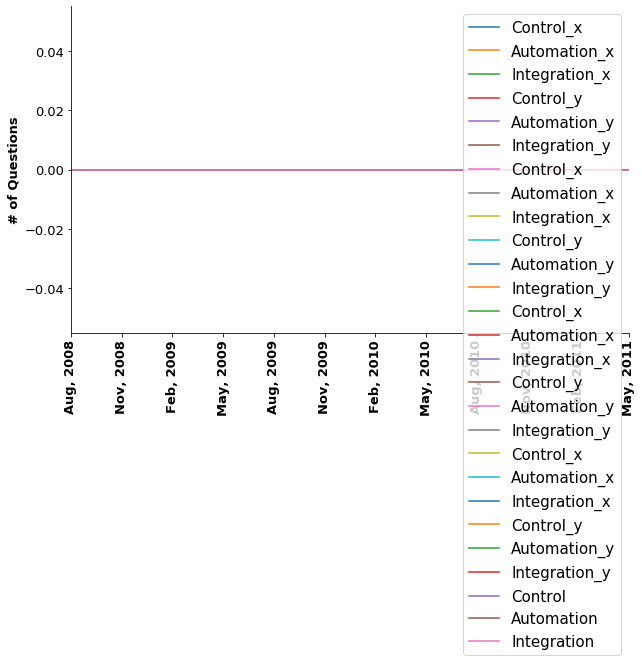

In [20]:
font_size = 13
ax = final_df.drop(columns='Total').plot(figsize=(10,6), fontsize=font_size)
# plt.xlabel('Year')
ax1 = plt.axes()
ax1.xaxis.label.set_visible(False)

plt.ylabel('# of Questions', weight='bold', size=font_size)
print(final_df.index)
print(type(plt))
print(type(final_df.index[0]))


# ax.set_xticklabels(['xyz 2009','xyz 2011','xyz 2013','xyz 2015','xyz 2017','xyz 2019', 'Jan 2021'], rotation=0)
labels = [x.strftime("%b, %Y") for x in final_df.index]
ax.set_xticks(labels)
ax.set_xticklabels(labels, rotation=90, weight = 'bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# ax.legend(fontsize='x-large')
ax.legend(fontsize=font_size + 2)

# plt.grid()
# plt.savefig('Question_per_higher_category_2.png', dpi=1000, bbox_inches = "tight")
plt.savefig('Question_per_higher_category_3M.pdf', dpi=1000, bbox_inches = "tight")
# plt.savefig('Question_per_higher_category.eps', format='eps', dpi=1000, bbox_inches = "tight")

plt.show()



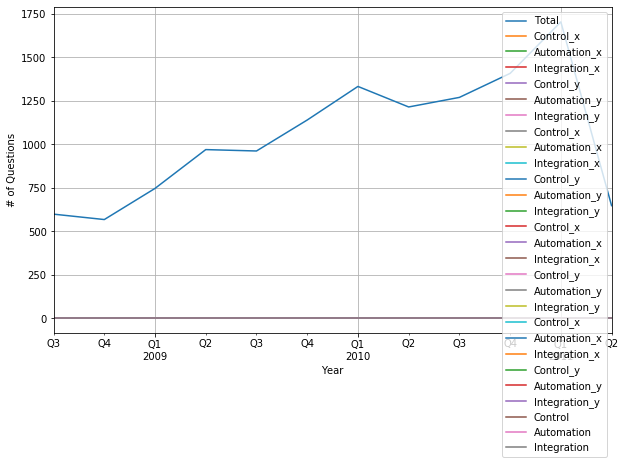

In [21]:
final_df.plot(figsize=(10,6))
plt.xlabel('Year')
plt.ylabel('# of Questions')
plt.grid()
plt.savefig('Topic_Modeling_Higher_Cat_Per_Six_Month_With_Total.png', dpi=1000)
plt.show()